<a href="https://colab.research.google.com/github/rpregalado86/DatosLimpios/blob/main/CleanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
%matplotlib inline

In [ ]:
#Importar Data Set Original
url='https://raw.githubusercontent.com/rpregalado86/DataSetOriginal/main/dataset.csv'
dataOriginal=pd.read_csv(url,sep=';', encoding='latin-1')
print(dataOriginal.head(10))

   product_id  ... merchant_has_profile_picture
0           1  ...                            0
1           2  ...                            0
2           3  ...                            0
3           4  ...                            0
4           5  ...                            0
5           6  ...                            0
6           7  ...                            1
7           8  ...                            0
8           9  ...                            0
9          10  ...                            0

[10 rows x 26 columns]


In [ ]:
#Obtener cantidad valores nulos
dataOriginal.isnull().sum()[dataOriginal.isnull().sum() !=0]

product_color                  29
product_variation_size_id      12
has_urgency_banner           1040
origin_country                 17
merchant_info_subtitle          1
dtype: int64

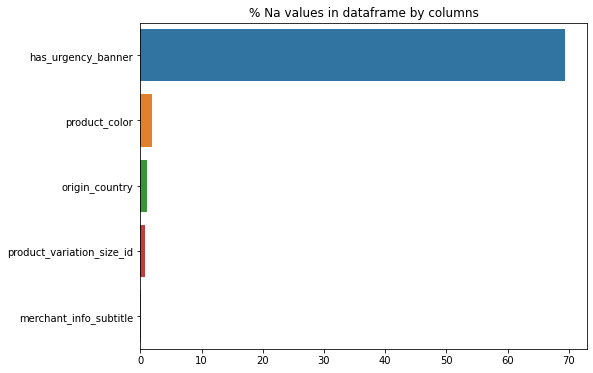

In [ ]:
#Graficar cantidad de valores nulos
def plot_missing_data(dataOriginal):
    columns_with_null = dataOriginal.columns[dataOriginal.isna().sum() > 0]
    null_pct = (dataOriginal[columns_with_null].isna().sum() / dataOriginal.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');

plot_missing_data(dataOriginal)

In [ ]:
#Exploracion atributos nombre - cantidad- tipo
dataOriginal.info()

In [ ]:
#Descripcion de Data 
dataOriginal.describe()

In [ ]:
#Agrupar atributos por tipo de dato
typeData = dataOriginal.columns.to_series().groupby(dataOriginal.dtypes).groups
dataObject = typeData[np.dtype('object')]
dataFloat = typeData[np.dtype('float64')]
dataInt = typeData[np.dtype('int64')]
print(dataObject)
print(dataFloat)
print(dataInt)

Index(['price', 'tags', 'product_color', 'product_variation_size_id',
       'origin_country', 'merchant_title', 'merchant_info_subtitle',
       'merchant_rating'],
      dtype='object')
Index(['rating', 'has_urgency_banner'], dtype='object')
Index(['product_id', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_has_profile_picture'],
      dtype='object')


In [ ]:
#Verificar registros duplicados
dup=dataOriginal.duplicated()
print(dup)

In [ ]:
#Tratamiento de atributo price
dataOriginal['price'] = pd.to_numeric(dataOriginal['price'],errors = 'coerce')
#Llenado de valores nulos con la media aritmética
dataOriginal['price'] = dataOriginal['price'].fillna(dataOriginal['price'].mean())
dataOriginal['price'] = pd.Series([round(val,2) for val in dataOriginal['price']]) 

In [ ]:
#Crear categorias de ropa Wish
df_cat = pd.DataFrame()
df_cat['categoria'] = ['underwear','long skirt','shoes','slippers','sandals','beach shorts',
                       'dyes', 'robes','print dress','bras','lace dress','trousers','skirts',
                       'dresses','swimsuit','bikini','slim','vest','pants','blouse','t shirts',
                       'shirt','tops','shorts']

In [ ]:
#Tratamiento atributo tags en base a solo las principales categorias
dataOriginal['tags'] = dataOriginal['tags'].str.lower()
dataOriginal['tags'] = dataOriginal['tags'].str.strip()
for i in range(len(dataOriginal)):
  for j in range(len(df_cat)):
      buscar=df_cat['categoria'][j]
      aux=dataOriginal['tags'][i].find(buscar)
      if aux != -1:
          dataOriginal['tags'][i]=buscar
          break
for i in range(len(dataOriginal)):
  aux=dataOriginal['tags'][i].find('/')
  if aux != -1:
      dataOriginal['tags'][i]=None
modeCat = dataOriginal['tags'].mode()[0]
dataOriginal['tags'] = dataOriginal['tags'].fillna(modeCat)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Crear coloress de ropa Wish
df_colors = pd.DataFrame()
df_colors['colors'] = ['black','white','pink','yellow','blue','red','green', 'grey','purple','orange','beige','khaki','coffee','brown']

In [ ]:
df_colors.info()

In [ ]:
#Tratamiento atributo product_color en base a solo las principales categorias
dataOriginal['product_color'] = dataOriginal['product_color'].str.lower()
dataOriginal['product_color'] = dataOriginal['product_color'].str.strip()
modeColor = dataOriginal['product_color'].mode()[0]
dataOriginal['product_color'] = dataOriginal['product_color'].fillna(modeColor)

for i in range(len(dataOriginal)):
  for j in range(len(df_colors)):
      buscar=df_colors['colors'][j]
      aux=dataOriginal['product_color'][i].find(buscar)     
      if aux != -1:
          dataOriginal['product_color'][i]=buscar
          break
      else:
        if j==13:
          dataOriginal['product_color'][i]='others'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
#Crear categorias de tallas
df_size = pd.DataFrame()
df_size['size'] = ['xs','xl','l','m','s']

In [ ]:
#Tratamiento atributo product_variation_size_id en base a solo las principales categorias
dataOriginal['product_variation_size_id'] = dataOriginal['product_variation_size_id'].str.lower()
dataOriginal['product_variation_size_id'] = dataOriginal['product_variation_size_id'].str.strip()
modeSize = dataOriginal['product_variation_size_id'].mode()[0]
dataOriginal['product_variation_size_id'] = dataOriginal['product_variation_size_id'].fillna(modeSize)
print(len(df_size))
for i in range(len(dataOriginal)):
  for j in range(len(df_size)):
      buscar=df_size['size'][j]
      aux=dataOriginal['product_variation_size_id'][i].find(buscar)     
      if aux != -1:
          dataOriginal['product_variation_size_id'][i]=buscar
          break
      else:
        if j==4:
          dataOriginal['product_variation_size_id'][i]='others'

5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
#Procesamiento atributo has_urgency_banner
dataOriginal['has_urgency_banner'] = dataOriginal['has_urgency_banner'].fillna('0')
dataOriginal['has_urgency_banner'] = pd.to_numeric(dataOriginal['has_urgency_banner'],errors = 'coerce')
#Procesamiento atributo origin_country
modeCountry = dataOriginal['origin_country'].mode()[0]
dataOriginal['origin_country'] = dataOriginal['origin_country'].fillna(modeCountry)


In [ ]:
#Procesamiento del atributo merchant_rating
for i in range(len(dataOriginal)):
  dato=dataOriginal['merchant_rating'][i]
  if len(dato) < 21:
    dat=dataOriginal['merchant_rating'][i]
    dat='0.'+dat
    dataOriginal['merchant_rating'][i]=dat
#Dejar con dos decimales
for i in range(len(dataOriginal)):
  dat=dataOriginal['merchant_rating'][i]
  dat=dat[:dat.index('.')+3]
  dataOriginal['merchant_rating'][i]=dat

#Coversión object a float64
dataOriginal['merchant_rating'] = pd.to_numeric(dataOriginal['merchant_rating'],errors = 'coerce')
modeMer = dataOriginal['merchant_rating'].mode()[0]
dataOriginal['merchant_rating'] = dataOriginal['merchant_rating'].fillna(modeMer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
#Procesamiento atributo merchant_info_subtitle
modeMer = dataOriginal['merchant_info_subtitle'].mode()[0]
dataOriginal['merchant_info_subtitle'] = dataOriginal['merchant_info_subtitle'].fillna(modeMer)
dataOriginal['merchant_info_subtitle'] = dataOriginal['merchant_info_subtitle'].str.lower()
dataOriginal['merchant_info_subtitle'] = dataOriginal['merchant_info_subtitle'].str.strip()
#Se quita todo el texto desde el caracter %
dataOriginal['merchant_info_subtitle']=dataOriginal['merchant_info_subtitle'].replace(to_replace=r'.\%.+\)$', value='', regex=True)
#Convercion de una tributo object a numérico
dataOriginal['merchant_info_subtitle'] = pd.to_numeric(dataOriginal['merchant_info_subtitle'],errors = 'coerce')
#Llenado de valores nulos con la media aritmética
dataOriginal['merchant_info_subtitle'] = dataOriginal['merchant_info_subtitle'].fillna(dataOriginal['merchant_info_subtitle'].mean())
dataOriginal['merchant_info_subtitle'] = pd.Series([round(val,2) for val in dataOriginal['merchant_info_subtitle']]) 

In [ ]:
#Valores unicos 
sorted(dataOriginal['tags'].unique())

['beach shorts',
 'bikini',
 'blouse',
 'bras',
 'dresses',
 'dyes',
 'lace dress',
 'long skirt',
 'pants',
 'print dress',
 'robes',
 'shirt',
 'shoes',
 'shorts',
 'skirts',
 'slim',
 'swimsuit',
 't shirts',
 'tops',
 'trousers',
 'underwear',
 'vest']

In [ ]:
#Cantidades por grupos
count = dataOriginal['product_color'].value_counts()
print(count[:30])

black     343
white     267
blue      155
red       136
green     132
pink      112
yellow     99
grey       69
others     69
purple     50
orange     28
beige      12
khaki      11
brown       7
coffee      7
Name: product_color, dtype: int64


In [ ]:
#Ver primoros 30 registros de los atributos indicados
print(dataOriginal[['product_id','merchant_rating']].head(30)) 

    product_id  merchant_rating
0            1             4.12
1            2            38.99
2            3             3.98
3            4             4.02
4            5             4.00
5            6            35.07
6            7             4.07
7            8             3.68
8            9             3.80
9           10             3.99
10          11            39.56
11          12             3.98
12          13             4.12
13          14            39.47
14          15             4.13
15          16             4.06
16          17             3.95
17          18             3.93
18          19             4.08
19          20             4.06
20          21             4.25
21          22            39.81
22          23             4.23
23          24             4.26
24          25             4.00
25          26            41.10
26          27             0.42
27          28             4.01
28          29             3.83
29          30             4.06


In [ ]:
from sklearn.model_selection import train_test_split 
#Separación Data Set Train - Test (80%-20%)
train, test = train_test_split(dataOriginal, test_size = 0.20,random_state = 45)
dataTrain = pd.DataFrame(train,columns=dataOriginal.columns.tolist())
dataTest = pd.DataFrame(test,columns=dataOriginal.columns.tolist())

In [ ]:
#Separar Data Set Entrenamoento y Test
yWork = dataOriginal['units_sold']
XWork = dataOriginal.drop(['units_sold'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(XWork, yWork, test_size=0.2, random_state=45)
columnaY=['units_sold']
dataX_train = pd.DataFrame(X_train,columns=XWork.columns.tolist())
dataX_test = pd.DataFrame(X_test,columns=XWork.columns.tolist())
datay_train = pd.DataFrame(y_train,columns=columnaY)
datay_test = pd.DataFrame(y_train,columns=columnaY)
dataGraficar = pd.DataFrame(X_train,columns=XWork.columns.tolist())

In [ ]:
print(dataTrain.head(30)) 

In [ ]:
print(dataOriginal.shape)
print(dataTrain.shape)
print(dataTest.shape)
print(dataTrain.head(30))

In [ ]:
dataClean = pd.DataFrame(dataOriginal,columns=dataOriginal.columns.tolist())

In [ ]:
print(dataClean['tags'].head(30))

0     underwear
1       dresses
2      swimsuit
3      t shirts
4         pants
5       dresses
6        blouse
7       dresses
8          slim
9        blouse
10      dresses
11       blouse
12        pants
13         vest
14         tops
15     t shirts
16      dresses
17       blouse
18         vest
19         slim
20     swimsuit
21         slim
22         vest
23         slim
24         vest
25         slim
26     swimsuit
27         slim
28         slim
29         slim
Name: tags, dtype: object


In [ ]:
#Coverción categorias a valor numérico dataTrain 
tiposData = dataClean.columns.to_series().groupby(dataClean.dtypes).groups
dataObject = tiposData[np.dtype('object')]
if len(dataObject) != 0:
  for i in dataObject:
    dataClean[i], _ = pd.factorize(dataClean[i])

KeyError: ignored

In [ ]:
#Se realiza el normalización de los datos 
from sklearn import preprocessing
aux_normalizada = preprocessing.Normalizer().fit_transform(dataTrain)
dataNormalizada = pd.DataFrame(aux_normalizada,columns=dataTrain.columns.tolist(), index = dataTrain.index)

In [ ]:
# Escalado de las variables 
dataScaled = scale(X=dataTrain, axis=0, with_mean=True, with_std=True) 
dataScaled = pd.DataFrame(dataScaled, columns=dataTrain.columns, index=dataTrain.index)
dataScaled.head(4)

In [ ]:
#Se realiza el escalamiento de los datos
aux = dataTrain.values 
dfscaler = preprocessing.MinMaxScaler()
aux_scaled = dfscaler.fit_transform(aux)
dataEscalada = pd.DataFrame(aux_scaled,columns=dataTrain.columns.tolist(), index = dataTrain.index)

In [ ]:
# Correlation Heat Map Normalizada
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(dataEscalada2.corr(), annot=True, ax=ax,cmap='Blues_r')
ax.add_patch(plt.Rectangle((0,3),21,1, fill = False, edgecolor = 'orange', lw = 5))
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Correlation Heat Map Escalada
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(dataEscalada.corr(), annot=True, ax=ax,cmap='Blues_r')
ax.add_patch(plt.Rectangle((0,3),21,1, fill = False, edgecolor = 'orange', lw = 5))
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [ ]:
#Ver la correlacion de los atributos respecto a units_sold Normalizada
target_col = 'units_sold'
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(dataNormalizada.corr()[['units_sold']].sort_values(by='units_sold', ascending=False),vmin=-1, vmax=1, annot=True, cmap='Blues_r')
heatmap.set_title(f'Valores de correlación referente a units_sold', fontdict={'fontsize':13}, pad=10);

In [ ]:
#Ver la correlacion de los atributos respecto a units_sold Escalada
target_col = 'units_sold'
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(dataEscalada.corr()[['units_sold']].sort_values(by='units_sold', ascending=False),vmin=-1, vmax=1, annot=True, cmap='Blues_r')
heatmap.set_title(f'Valores de correlación referente a units_sold', fontdict={'fontsize':13}, pad=10);

In [ ]:
dataEscalada=dataEscalada.drop(['product_id'], axis=1)
dataEscalad2=dataEscalada2.drop(['product_id'], axis=1)

In [ ]:
dataEscalada.info()

In [ ]:
dataNormalizada=dataNormalizada.drop(['product_id'], axis=1)


In [ ]:
dataScaled=dataScaled.drop(['product_id'], axis=1)

In [ ]:
dataScaled2=dataScaled2.drop(['product_id'], axis=1)

In [ ]:
dataNormalizadaSin_UnitSold=dataNormalizadaSin_UnitSold.drop(['product_id'], axis=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Algoritmo univariante - Prueba F. (Reduccion de atributos)
y = dataNormalizada['units_sold']
X = dataNormalizada.drop(['units_sold'], axis=1)
columnas = list(X.columns.values)
seleccionar = SelectKBest(f_classif, k=20).fit(X,y)
atributos = seleccionar.get_support()
mejoresAtributos = [columnas[i] for i in list(atributos.nonzero()[0])]
mejoresAtributos

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


['rating_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'tags',
 'product_color',
 'product_variation_size_id',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'origin_country',
 'merchant_title',
 'merchant_info_subtitle',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']

In [ ]:
dataEscalada.info()

In [ ]:
#Eliminar atributos menos importantes
dataEscalada.drop(['badge_local_product'], axis = 'columns', inplace=True)
dataEscalada.drop(['badge_fast_shipping'], axis = 'columns', inplace=True)
dataEscalada.drop(['shipping_is_express'], axis = 'columns', inplace=True)
dataEscalada.drop('has_urgency_banner', axis=1, inplace=True)

In [ ]:
#Eliminar atributos menos importantes
dataEscalada2.drop(['badge_local_product'], axis = 'columns', inplace=True)
dataEscalada2.drop(['badge_fast_shipping'], axis = 'columns', inplace=True)
dataEscalada2.drop(['shipping_is_express'], axis = 'columns', inplace=True)
dataEscalada2.drop('has_urgency_banner', axis=1, inplace=True)

In [ ]:
#Eliminar atributos menos importantes
dataNormalizada.drop(['badge_local_product'], axis = 'columns', inplace=True)
dataNormalizada.drop(['badge_fast_shipping'], axis = 'columns', inplace=True)
dataNormalizada.drop(['shipping_is_express'], axis = 'columns', inplace=True)
dataNormalizada.drop('has_urgency_banner', axis=1, inplace=True)

In [ ]:
#Eliminar atributos menos importantes
dataNormalizadaSin_UnitSold.drop(['badge_local_product'], axis = 'columns', inplace=True)
dataNormalizadaSin_UnitSold.drop(['badge_fast_shipping'], axis = 'columns', inplace=True)
dataNormalizadaSin_UnitSold.drop(['shipping_is_express'], axis = 'columns', inplace=True)
dataNormalizadaSin_UnitSold.drop('has_urgency_banner', axis=1, inplace=True)

In [ ]:
#Eliminar atributos menos importantes
dataScaled.drop(['badge_local_product'], axis = 'columns', inplace=True)
dataScaled.drop(['badge_fast_shipping'], axis = 'columns', inplace=True)
dataScaled.drop(['shipping_is_express'], axis = 'columns', inplace=True)
dataScaled.drop('has_urgency_banner', axis=1, inplace=True)

In [ ]:
#Eliminar atributos menos importantes
dataScaled2.drop(['badge_local_product'], axis = 'columns', inplace=True)
dataScaled2.drop(['badge_fast_shipping'], axis = 'columns', inplace=True)
dataScaled2.drop(['shipping_is_express'], axis = 'columns', inplace=True)
dataScaled2.drop('has_urgency_banner', axis=1, inplace=True)

In [ ]:
#Aplicar PCA para reduccion de dimensionalidad
pca = PCA()
X_trainPCA = pca.fit_transform(dataNormalizada)
X_testPCA = pca.transform(dataNormalizada)
explained_variance = pca.explained_variance_ratio_.cumsum()
print(explained_variance)

[0.61261569 0.92858377 0.98407306 0.99055645 0.99620884 0.99779154
 0.99881722 0.99947438 0.99986347 0.99991583 0.99995574 0.99997834
 0.99999598 0.99999808 0.99999901 0.99999941 0.99999971 0.99999987
 0.99999997 0.99999999 1.        ]


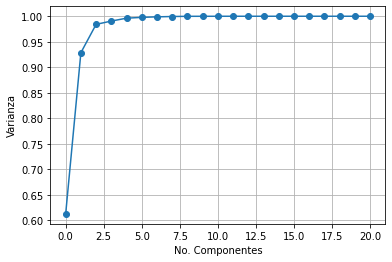

In [ ]:
#fig, ax= plt.subplot()
plt.plot(explained_variance, marker='o')
plt.ylabel("Varianza")
plt.xlabel("No. Componentes")
plt.grid()
plt.show()

In [ ]:
#Aplicamos la cantidad de componentes encontrados
pca = PCA(n_components = 5)
X_trainPCA = pca.fit_transform(dataNormalizada)

Text(0, 0.5, 'Inercia')

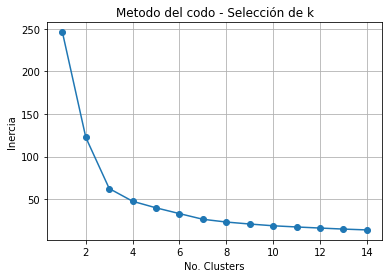

In [ ]:
# Método del Codo (Inercia)
rangeCluster = range(2, 15)
inercia = []
for k in rangeCluster:
    #modelKmeans = KMeans(n_clusters = k, n_init = 25, random_state=45).fit(dataWork[['units_sold']])X_trainPCA
    modelKmeans = KMeans(n_clusters = k, n_init = 25, random_state=45).fit(dataNormalizada)
    inercia.append(modelKmeans.inertia_)
fig, ax = plt.subplots(1, 1)
ax.plot(rangeCluster, inercia, marker='o')
ax.set_title("Metodo del codo - Selección de k")
ax.grid()
ax.set_xlabel('No. Clusters')
ax.set_ylabel('Inercia')

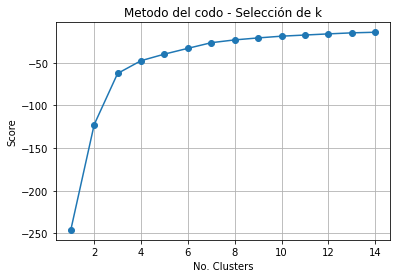

In [ ]:
#Metodo del Codo (Score)
rangeCluster = range(2, 15)
kmeans = [KMeans(n_clusters=i, random_state=45) for i in rangeCluster]
score = [kmeans[i].fit(dataNormalizada).score(dataNormalizada) for i in range(len(kmeans))]
plt.plot(rangeCluster,score,marker='o')
plt.grid()
plt.xlabel('No. Clusters')
plt.ylabel('Score')
plt.title('Metodo del codo - Selección de k')
plt.show()

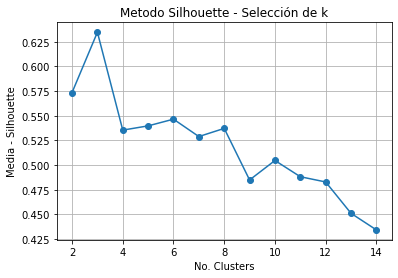

In [ ]:
#Metodo de la silueta
rangeCluster = range(2, 15) 
valSilhouette = []

for k in rangeCluster: 
  modelKmeans = KMeans( n_clusters = k, n_init = 25, random_state = 45 ) 
  labelsModel = modelKmeans.fit_predict(dataNormalizada) 
  silhouetteAVG = silhouette_score(dataNormalizada, labelsModel) 
  valSilhouette.append(silhouetteAVG)

fig, ax = plt.subplots(1, 1) 
ax.plot(rangeCluster, valSilhouette, marker='o') 
ax.set_title("Metodo Silhouette - Selección de k") 
ax.set_xlabel('No. Clusters') 
ax.grid()
ax.set_ylabel('Media - Silhouette');

In [ ]:
#Algoritmo K-Means (K=6)
AlgoritmoKmeans = KMeans(n_clusters=4,random_state=45).fit(dataNormalizada)
centroidsKmeans = AlgoritmoKmeans.cluster_centers_
print(centroidsKmeans)

[[1.88752544e-03 4.11832390e-03 7.86232140e-01 9.35418416e-05
  7.94176254e-04 1.31511927e-01 2.52303963e-05 1.94475073e-05
  1.58816193e-03 9.44895141e-04 2.87353115e-04 7.54017429e-03
  5.19809802e-04 7.83581782e-03 1.05617953e-02 7.30879530e-06
  7.97121144e-02 1.71648851e-02 4.58608927e-01 3.33514907e-03
  1.33765610e-05]
 [1.34611933e-03 3.83547806e-03 5.80334925e-02 6.34313705e-05
  6.08053770e-04 1.55343680e-02 1.84169400e-05 1.26473108e-05
  1.15718908e-03 6.26938540e-04 2.50456526e-04 4.97670034e-03
  3.65770539e-04 6.52913426e-03 7.77173711e-03 3.89403624e-06
  4.88136967e-02 1.28096011e-02 9.68217702e-01 2.15182324e-03
  1.62637663e-05]
 [1.08206460e-02 3.33101662e-02 9.28509179e-02 5.19971410e-04
  4.67152369e-03 2.03003126e-02 4.03257597e-05 2.29062435e-05
  9.19204595e-03 4.87295271e-03 2.48994877e-03 2.80663478e-02
  2.94393327e-03 4.73641221e-02 6.18251826e-02 1.64578655e-04
  4.18424365e-01 1.02638359e-01 2.22879706e-01 2.34831135e-02
  4.28329404e-06]
 [1.35760356e-03

In [ ]:
labels = AlgoritmoKmeans.predict(dataNormalizada)
dataGraficar2['label'] = labels

In [ ]:
dataGraficar2.info()

In [ ]:
#Saber cuantos registros
cantGrupo=dataGraficar2['label'].value_counts() 
print(cantGrupo)

1    645
3    218
0    184
2    150
Name: label, dtype: int64


In [ ]:
#Saber cuantos registros
cantGrupo=dataGraficar2['label'].value_counts() 
print(cantGrupo)

In [ ]:
dataGraficar2.describe()

In [ ]:
dataGraficar2.groupby(['label','product_color']).count()

In [ ]:
dataGraficar2.label.value_counts()

1    596
3    216
0    186
2     87
4     73
5     39
Name: label, dtype: int64

In [ ]:
dataGraficar2.isnull().sum()[dataGraficar2.isnull().sum() !=0]

Series([], dtype: int64)

In [ ]:
dfg0=dataGraficar2[dataGraficar2.label==0]
dfg1=dataGraficar2[dataGraficar2.label==1]
dfg2=dataGraficar2[dataGraficar2.label==2]
dfg3=dataGraficar2[dataGraficar2.label==3]
dfg4=dataGraficar2[dataGraficar2.label==4]
dfg5=dataGraficar2[dataGraficar2.label==5]

In [ ]:
print(dfg0.shape)
print(dfg1.shape)
print(dfg2.shape)
print(dfg3.shape)
print(dfg4.shape)
print(dfg5.shape)

(186, 27)
(596, 27)
(87, 27)
(216, 27)
(73, 27)
(39, 27)


In [ ]:
dfg1.describe()

,product_id,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture,label
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02,596.000000,596.000000,596.0
mean,779.505034,8.419899,26.055369,1975.317114,0.421141,3.796258,434.953020,0.087248,0.010067,0.065436,0.008389,33.657718,2.313758,0.003356,41.964765,49.666107,0.303691,82.435503,4.291696e+04,15.079933,0.209732,1.0
std,450.384245,4.046477,32.760736,4101.433375,0.494157,0.485213,932.294775,0.299756,0.099913,0.247502,0.091285,21.199737,1.056653,0.057880,18.344063,3.511938,0.460237,14.153181,1.108498e+05,16.761295,0.407459,0.0
min,4.000000,1.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,2.000000,0.000000,7.000000,2.950000e+02,0.380000,0.000000,1.0
25%,396.750000,5.822500,7.000000,100.000000,0.000000,3.510000,23.750000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,36.000000,50.000000,0.000000,82.280000,7.240500e+03,4.020000,0.000000,1.0
50%,778.500000,8.000000,11.000000,1000.000000,0.000000,3.850000,99.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,41.000000,50.000000,0.000000,84.500000,1.774500e+04,4.160000,0.000000,1.0
75%,1171.500000,11.000000,33.000000,1000.000000,1.000000,4.080000,512.750000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.000000,88.000000,4.310825e+04,38.702500,0.000000,1.0
max,1572.000000,49.000000,252.000000,50000.000000,1.000000,5.000000,10122.000000,2.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.000000,96.000000,2.174765e+06,45.010000,1.000000,1.0


In [ ]:
dfg0.tags.value_counts()

dresses         41
vest            23
blouse          17
swimsuit        15
pants           13
trousers        12
slim            11
t shirts        10
shirt            7
tops             5
shorts           5
bras             5
underwear        4
beach shorts     4
skirts           4
print dress      3
dyes             2
robes            2
shoes            1
bikini           1
lace dress       1
Name: tags, dtype: int64

In [ ]:
dfg1.tags.value_counts()

dresses         117
slim             81
vest             56
blouse           49
pants            42
swimsuit         35
t shirts         33
shorts           25
skirts           25
trousers         25
bras             18
tops             18
shirt            17
lace dress       12
dyes             10
print dress      10
robes             8
beach shorts      6
long skirt        4
underwear         3
bikini            2
Name: tags, dtype: int64

In [ ]:
dataGraficar2.shape

(1197, 27)

In [ ]:
print(dataGraficar2['label'].head(10))

315     1
374     4
296     3
134     0
970     0
234     1
957     0
123     3
388     3
1049    1
Name: label, dtype: int32


In [ ]:
#Definir datos a graficar.
xPrint = dataGraficar2['rating'].values
yPrint = dataGraficar2['units_sold'].values

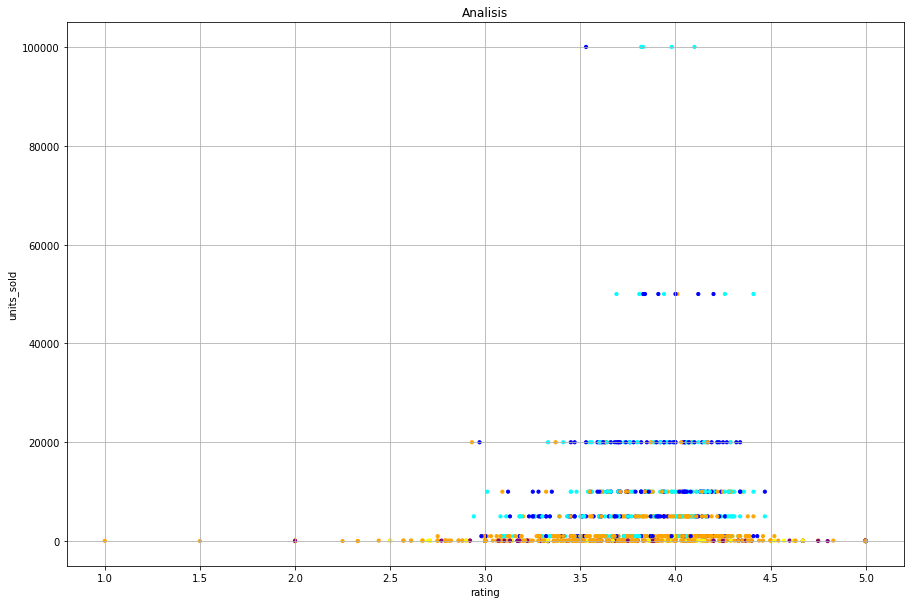

In [ ]:
#%% Plot k-means clustering.
colores=['blue','orange','purple','cyan','yellow','orange','purple']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.figure(figsize=(15,10))
plt.scatter(xPrint, yPrint, c=asignar, s=10)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('rating')
plt.grid()
plt.ylabel('units_sold')
plt.title('Analisis') 
plt.show()

In [ ]:
data.to_csv('datoLimpios.csv', index=False)
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')